# Assignment-11

# Text Mining (Extract reviews of any product from ecommerce website like amazon and Perform emotion mining)

In [9]:
pip install wordcloud

# Importing Libraries

In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [2]:
#creating an empty review list
redmi_reviews = []

# Extracting reviews from amazon for product Redmi SmartPhone

In [3]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/Redmi-Pro-Blue-64GB-Storage/product-reviews/B07DJHR5DY/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    redmi_reviews = redmi_reviews+ip

In [4]:
redmi_reviews

['\nGood\n',
 '\nUse for forever and used to all and most traveling time so very used full to all time and used\n',
 '\nVery good product\n',
 "\nIt's good as i use.\n",
 '\nNice\n',
 '\nI used more than 3 years but this time mobile is very good condition and work properly.. and finally today I am selling this phone on 4000 rupees .. Velu for money 💰💸\n',
 '\nExcellent product\n',
 '\nHey guys this is TECHBORED! and this is unboxing and also will adding some camera shots.-----------------------IN THE BOX-----------------------1. Manuals with warranty information.2. Charging cable.3. 5V 2A power adapter.4. Transparent TPU case.5. Redmi 6 Pro.----------DESIGN----------1. The transparent case fits well and is a perfect fit. Gives nice feel in hands.2. It comes with a notch that is small and I really liked it, At least Xiaomi has tried to cut out the bezels at this budget segment.3. It sports a FULL HD + display with that 19:9 aspect ratio.4. On the top of the phone there is this infrared 

In [5]:
##Writing reviews in a text file
with open("redmi.txt","w",encoding = 'utf-8') as output:
    output.write(str(redmi_reviews))

In [6]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(redmi_reviews)

# Data Cleaning

In [7]:
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [8]:
##Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")

# Stop words removal

In [9]:
stop_words = pd.read_csv('stop.txt',header=None,squeeze=True)
stop_words

C:\Users\hp\AppData\Local\Temp\ipykernel_16144\1088987621.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  stop_words = pd.read_csv('stop.txt',header=None,squeeze=True)


0               a
1             a's
2            able
3           about
4           above
          ...    
566         yours
567      yourself
568    yourselves
569             z
570          zero
Name: 0, Length: 571, dtype: object

**Word Frequency - Before Removing Stop Words**

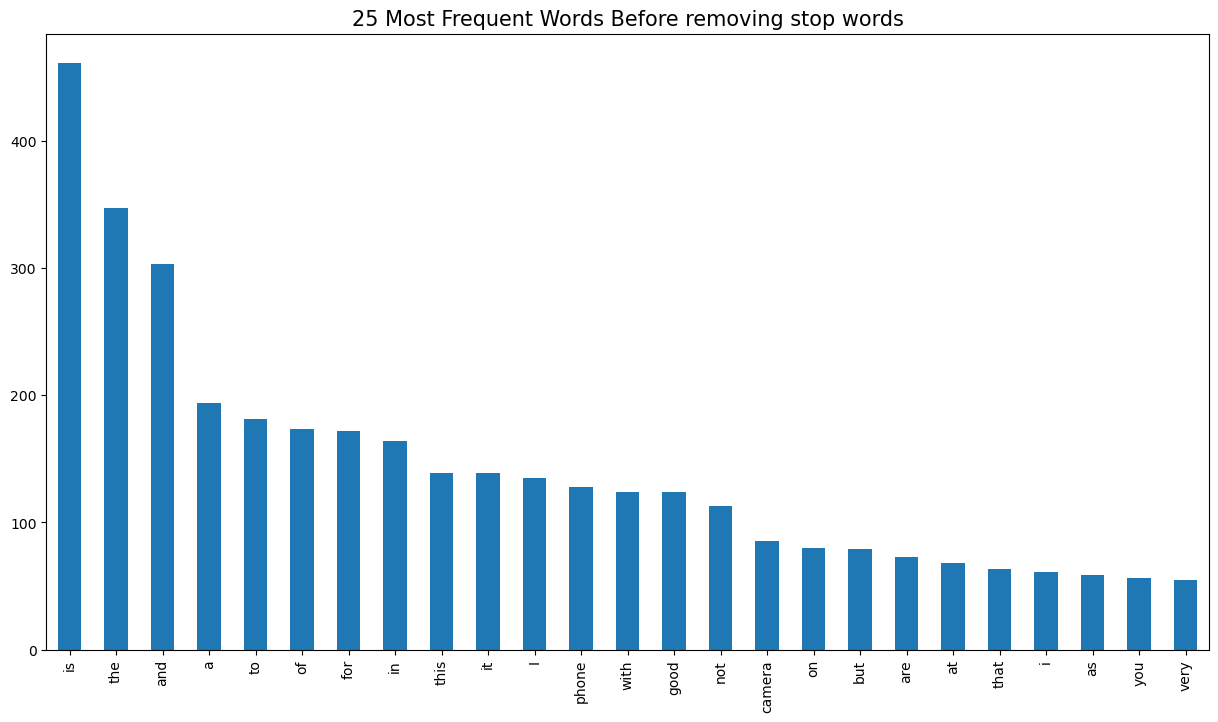

In [10]:
word_freq=pd.Series(" ".join(redmi_reviews).split()).value_counts()[:25]
word_freq.plot(kind='bar',figsize=(15,8))
plt.title('25 Most Frequent Words Before removing stop words',size=15)
plt.show()

Most of the words are already in stop word list

In [11]:
additional_stop_words = ['is','the','and']
stop_words=stop_words.append(pd.Series(additional_stop_words),ignore_index = True)
stop_words

C:\Users\hp\AppData\Local\Temp\ipykernel_16144\882946573.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stop_words=stop_words.append(pd.Series(additional_stop_words),ignore_index = True)


0          a
1        a's
2       able
3      about
4      above
       ...  
569        z
570     zero
571       is
572      the
573      and
Length: 574, dtype: object

In [12]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [13]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

# Word Cloud

In [14]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

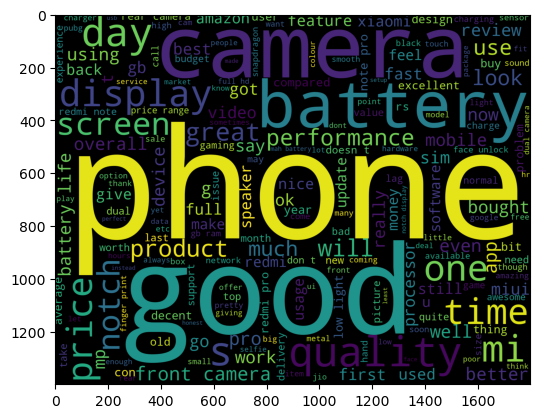

In [15]:
plt.imshow(wordcloud_ip)
plt.show()

In [16]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [17]:
negwords =negwords[37:]

In [18]:
##Considering only the words which are present in the positive words

red_pos = " ".join([w for w in red_rev_words if w in negwords])

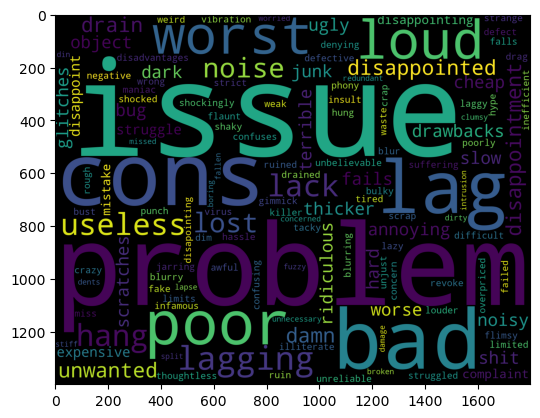

In [19]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

In [20]:
##Unique words
red_unique = list(set(" ".join(redmi_reviews).split(" ")))

In [21]:
red_unique

['',
 'nai',
 'heating',
 'charger.-No',
 'thick',
 'Display:-',
 'It',
 'however,',
 'again',
 '5Battery',
 'Zenfone',
 'downscaled',
 'treated',
 'free',
 'experice.',
 'bezzels',
 'PubG.Charging',
 'stunning',
 'week.\n',
 'configure.',
 'Finally',
 'deep,',
 'pocket-friendly',
 'camara',
 'MIUI10.4.',
 'graphy',
 'videos.5.',
 'well4.',
 'micro',
 '!!',
 'resolution',
 'sensor.Processor',
 'buttons',
 'worked',
 'location',
 '30%The',
 '4gig',
 'usage.',
 'On',
 'offers',
 'battery.-it',
 'reserved',
 'instead.',
 'phone...',
 'guard,',
 'SBI',
 'Need',
 'portrait',
 'spelling',
 '434.',
 'later',
 "phone's",
 'due',
 'completely',
 'eye',
 'under',
 'user.Some',
 '3GB,',
 'slot.---------------------------FACE',
 'harder',
 "space.Can't",
 'place\n',
 'panel.Cameras',
 'better',
 'Wi-Fi',
 'disappointed..',
 'C========================================Pro',
 'catching',
 'id',
 'polycarbonate',
 '\nBest',
 'fine.2.',
 'between',
 'airtel',
 '❤\n',
 'contents',
 'colour',
 'rest',
 's

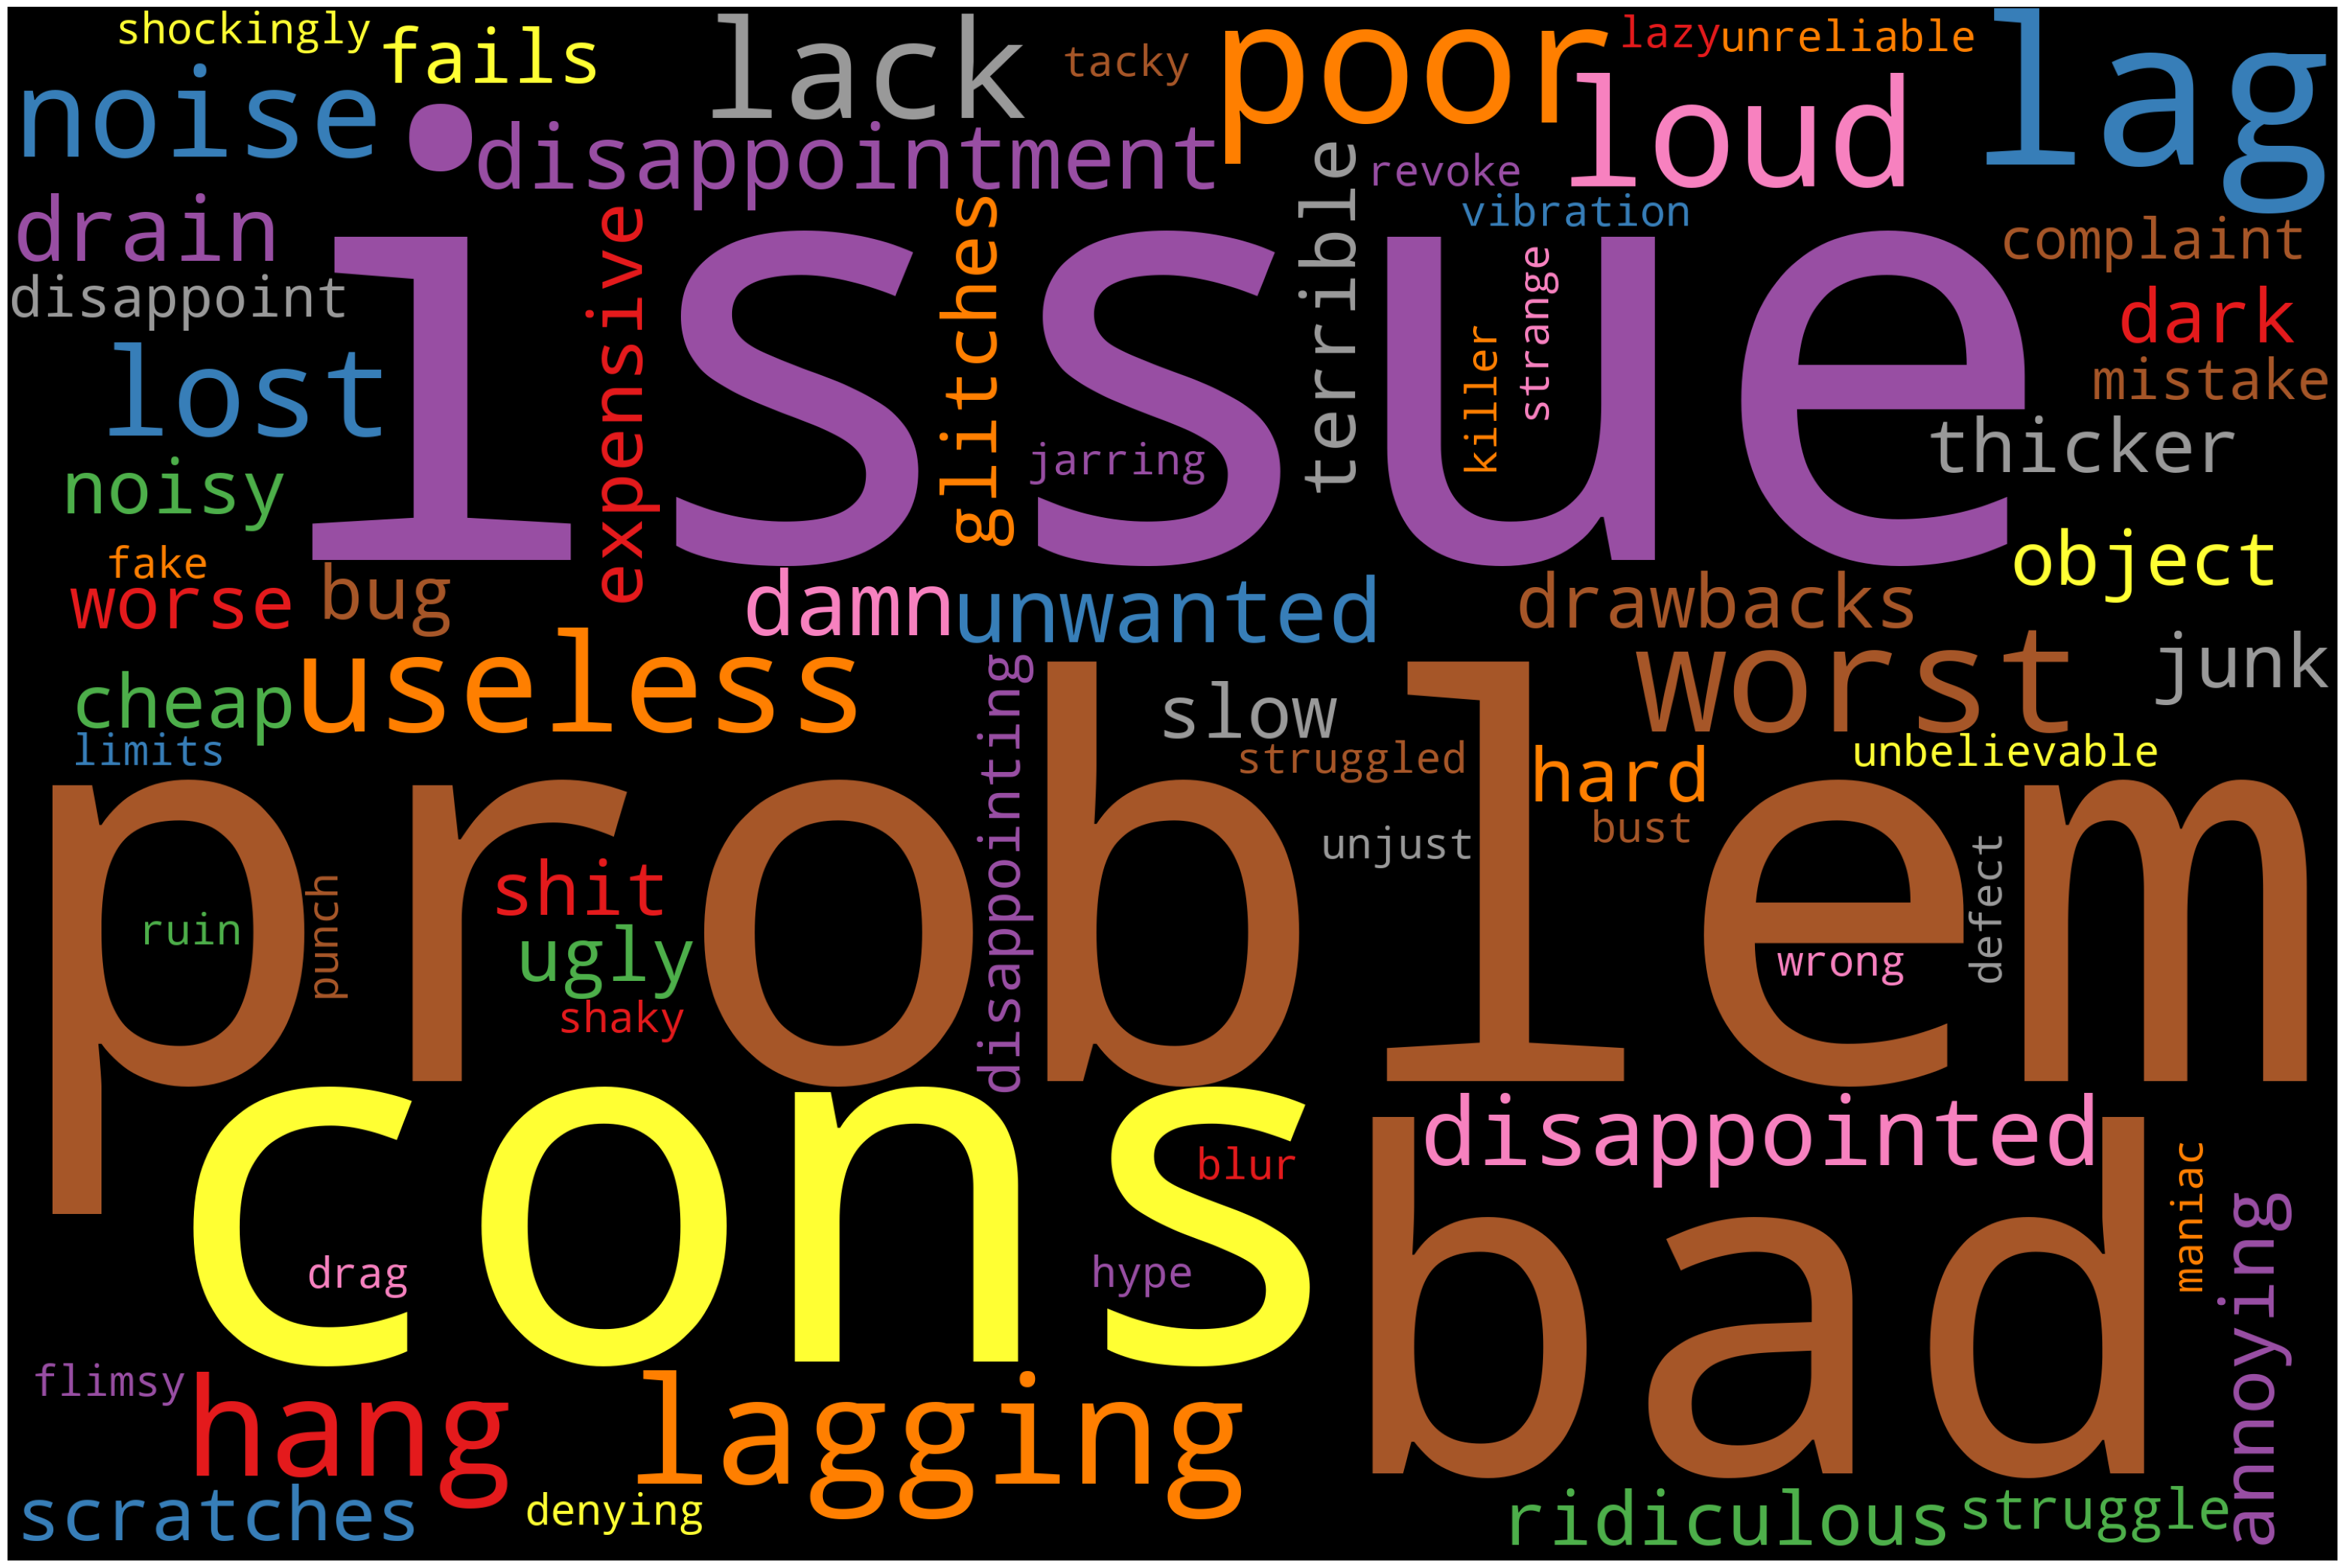

In [22]:
def plot_cloud(wordcloud_pos):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(red_pos)
plot_cloud(wordcloud)